# Interpret topic-model results

I ran ```topicmodel_gridsearch.Rmd``` five times, producing five different versions of ```topicmodel_deltas.csv.``` (All uploaded to github.)

The code below averages the five runs, and then pairs the averaged results with a data frame called ```interpret``` that stores the topic categorizes and sizes (the percentage of the corpus in each topic). These are used to produce a weighted average of delta across the corpus.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load the results of the R scripts.

In [2]:
root = 'topicmodel_deltas'

deltas = dict()

for i in range(1, 6):
    
    suffix = str(i) + '.csv'
    deltas[i] = pd.read_csv(root + suffix)
    
print(len(deltas), ' files loaded.')

5  files loaded.


In [3]:
deltas[1].head()

,depvar,cmse,pmse,totalr2,delta,adjdelta,bywidth,fpwidth,bydf,fpdf,pmse_oos,cmse_oos,delta_oos,r2_oos
0,t0,10.625,208.397,0.047679,0.048511,0.196610,by_20,fp_4,5,24,0.071000,0.003257,0.043864,0.027340
1,t1,4.319,25.653,0.013992,0.144101,0.201625,by_24,fp_16,4,6,0.029850,0.002211,0.068966,0.006283
2,t2,8.787,1.994,0.005109,0.815045,0.767714,by_24,fp_24,4,3,0.002117,0.002472,0.538668,-0.003695
3,t3,45.574,167.528,0.139734,0.213860,0.566308,by_20,fp_4,5,24,0.215235,0.029488,0.120495,0.122961
4,t4,59.187,13.012,0.027322,0.819776,0.630416,by_16,fp_24,8,3,0.012454,0.058356,0.824115,0.014960


There is some continuity but also sigificant divergence between different runs.

In [4]:
deltas[4].head()

,depvar,cmse,pmse,totalr2,delta,adjdelta,bywidth,fpwidth,bydf,fpdf,pmse_oos,cmse_oos,delta_oos,r2_oos,agemse
0,t0,10.625,208.397,0.047679,0.048511,0.196610,by_20,fp_4,5,24,0.077930,0.000150,0.001923,0.021714,0.191
1,t1,24.556,19.209,0.018856,0.561088,0.754183,by_20,fp_8,5,12,0.021526,0.085478,0.798832,0.000835,2.668
2,t2,34.288,17.816,0.010280,0.658068,0.590738,by_16,fp_16,8,6,0.031632,0.042898,0.575584,-0.008059,5.460
3,t3,45.291,141.936,0.135140,0.241904,0.433693,by_20,fp_8,5,12,0.158778,0.031397,0.165094,0.124308,11.181
4,t4,57.918,14.794,0.027720,0.796540,0.681065,by_12,fp_16,11,6,0.009295,0.045823,0.831364,0.005274,6.106


### Construct a data frame that has average values

In [5]:
smoothed = dict()

cols = ['delta', 'adjdelta', 'delta_oos', 'cmse', 'pmse', 'cmse_oos', 'pmse_oos', 
        'totalr2', 'r2_oos', 'bydf', 'fpdf', 'agemse']

for c in cols:
    if c not in smoothed:
        smoothed[c] = []
    for rownum in range(200):
        values = []
        for i in range(1, 6):
            if c in deltas[i].columns:      # the only exception is 'agemse' which got added late
                                            # and won't be in all five runs
                values.append(deltas[i].loc[rownum, c])
        smoothed[c].append(np.mean(values))

        
avgdf = pd.DataFrame(smoothed)

In [6]:
avgdf.head()

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse
0,0.052664,0.185230,0.078345,11.6860,209.5212,0.020000,0.102817,0.047869,0.024379,6.2,24.0,0.53325
1,0.578712,0.596288,0.689357,25.0768,16.0822,0.061597,0.017510,0.017090,0.003942,4.8,6.0,2.13175
2,0.642251,0.671377,0.433169,16.1334,9.5950,0.012027,0.011970,0.006939,-0.004519,4.8,5.4,2.73375
3,0.238089,0.454468,0.140974,46.8034,151.2078,0.029488,0.198506,0.136532,0.122522,5.6,16.0,9.89675
4,0.783425,0.661006,0.809441,61.5444,17.3744,0.078168,0.020837,0.028121,0.011077,8.6,4.8,4.91075


### Load the coding of the 200 topics

In [7]:
interpret = pd.read_csv('../interrater/k200standardcoding.tsv', sep = '\t')
interpret.drop(columns = ['next5books, biggestauth, datequartiles', 'comments'], inplace = True)
interpret.head()

,topicstats,keywords,top7books,label,category
0,TOPIC 0 pct corpus = 0.267% doc entropy = 9.80...,war german french germans france germany ameri...,"0.136 | Gibbs, Philip | Through the storm | 19...","war, mostly WWII",event
1,TOPIC 1 pct corpus = 0.288% doc entropy = 9.74...,professor man quite something thing old little...,"0.177 | Stewart, J. I. M. (John Innes | Hare ...","e20c scientists, labs, and professors, mostly ...",genre
2,TOPIC 2 pct corpus = 0.479% doc entropy = 10.4...,door put box paper hand took room went made po...,"0.489 | Sellers, Tom | Unknown Title | 1927 0....","objects in relation to doors, pockets, rooms, ...",physical description
3,TOPIC 3 pct corpus = 0.388% doc entropy = 9.34...,american people president our security re new ...,"0.297 | Digo, Benjamin | Creator of Nikho | 19...",late 20c US political thrillers,genre
4,TOPIC 4 pct corpus = 0.666% doc entropy = 10.3...,man old people men because knew good always bi...,"0.157 | Hanley, Gerald | Drinkers of darkness ...",diffuse,uncategorized dimension of style


For our present purposes, we don't need all this information, and we could use shorter category labels for visualization.

In [8]:
# FUNCTIONS THAT SIMPLIFY AND CLEAN THE CODING FRAME

def getpct(astring):
    firstpart = astring.split('%')[0]
    number = float(firstpart.split('= ')[1])
    return number

def shorten(astring):
    shortversion = astring[0:6]
    if shortversion == 'human ':
        shortversion = 'institu' # for human institution, practice, or relationship
    return shortversion

interpret['pct'] = interpret.topicstats.map(getpct)
interpret['category'] = interpret.category.map(shorten)
interpret.drop(columns = ['keywords', 'top7books', 'topicstats'], inplace = True)
interpret.head()

,label,category,pct
0,"war, mostly WWII",event,0.267
1,"e20c scientists, labs, and professors, mostly ...",genre,0.288
2,"objects in relation to doors, pockets, rooms, ...",physic,0.479
3,late 20c US political thrillers,genre,0.388
4,diffuse,uncate,0.666


### Concatenate the topic labels with all five frames of numeric results.

In [9]:
topics = dict()
for i in range(1, 6):
    topics[i] = pd.concat([deltas[i], interpret], axis = 1)

### And also with the average of all five.

In [10]:
avgdf = pd.concat([avgdf, interpret], axis = 1)

In [11]:
def weighted_avg(aframe):
    avg = sum(aframe.pct * aframe.cmse) / (sum(aframe.pct * aframe.cmse) + sum(aframe.pct * aframe.pmse))
    return avg

def weighted_avg_oos(aframe):
    avg = sum(aframe.pct * aframe.cmse_oos) / (sum(aframe.pct * aframe.cmse_oos) + sum(aframe.pct * aframe.pmse_oos))
    return avg

### Calculate average delta as per our pre-registered plan.

The columns that matter most are the "weighted" ones; we've already decided to care more about variables where the model is strong than about ones where r2 is low and no chronological variables are very predictive--also more about large topics than small ones.

In [12]:
print('raw in-sample\traw oos\t\tweighted in-sample\tweighted oos')
for i in range(1, 6):
    print(round(np.mean(topics[i].delta), 4), '\t\t', round(np.mean(topics[i].delta_oos), 4), '\t\t',
          round(weighted_avg(topics[i]), 4), '\t\t', round(weighted_avg_oos(topics[i]), 4))

raw in-sample	raw oos		weighted in-sample	weighted oos
0.5342 		 0.5011 		 0.5149 		 0.501
0.5432 		 0.4899 		 0.5331 		 0.5109
0.5621 		 0.4914 		 0.5372 		 0.4491
0.5553 		 0.5112 		 0.5653 		 0.5202
0.5551 		 0.493 		 0.5641 		 0.4744


In [13]:
print("Overall, weighted in-sample is", round(weighted_avg(avgdf), 4))
print("And out-of-sample: ", round(weighted_avg_oos(avgdf), 4))

Overall, weighted in-sample is 0.544
And out-of-sample:  0.4914


Actually, technically we proposed to exclude 'accidents of transcription' and 'author-dominated' categories from the average. This makes only a small difference.

In [14]:
legit = avgdf.loc[(avgdf.category != 'accide') & (avgdf.category != 'author'), :]
print("Overall, weighted in-sample is", round(weighted_avg(legit), 4))
print("And out-of-sample: ", round(weighted_avg_oos(legit), 4))

Overall, weighted in-sample is 0.5466
And out-of-sample:  0.4929


### Differences between topic categories

To start with, let's consider the way r2 was divided by anova (in-sample). I think this might be a little less noisy and better for comparisons between topics, even if it does slightly over-estimate cohort effects in the aggregate?

Here are category means:

In [15]:
cats = avgdf.category.unique()
deltadict = dict()
for c in cats:
    deltadict[c] = avgdf.loc[avgdf.category == c, 'delta'].tolist()
    print(c, np.mean(deltadict[c]))

event 0.3459638814227623
genre 0.5026526511882805
physic 0.6146181817452785
uncate 0.5398023378033946
techno 0.5748519565449998
institu 0.5550869014006015
dialec 0.5235631123147099
nation 0.6314228701069845
author 0.5601742301152037
accide 0.5010640282588195


And a visualization.

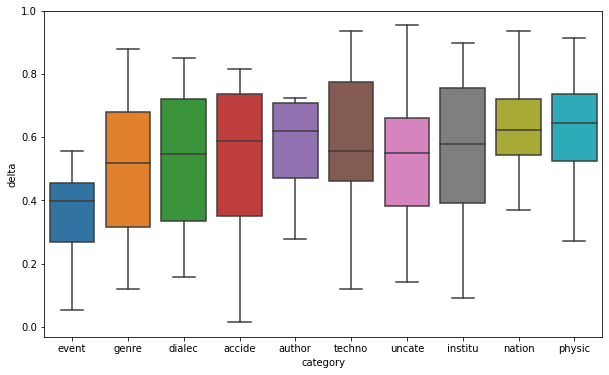

In [16]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = avgdf, x = 'category', y = 'delta', order = ['event', 'genre','dialec', 'accide', 'author',  'techno', 'uncate',  
                                                                  'institu', 'nation', 'physic'])
plt.show()

The most dramatic and stable pattern is that 'event' topics have much lower delta, and are more dominated by period factors. Here they are; as you can see, they're mostly wars.

In [17]:
avgdf.loc[avgdf.category == 'event', : ]

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
0,0.052664,0.185230,0.078345,11.6860,209.5212,0.020000,0.102817,0.047869,0.024379,6.2,24.0,0.53325,"war, mostly WWII",event,0.267
63,0.269352,0.395927,0.023510,10.7786,29.9736,0.000621,0.023230,0.012020,-0.003758,4.8,9.6,0.30050,revolutionary and communist movements,event,0.348
86,0.555281,0.565166,0.478879,42.1664,34.0802,0.017909,0.022856,0.018071,0.002273,6.2,7.2,0.61975,"warfare, probably centered on WWI",event,0.212
110,0.396742,0.412263,0.437117,19.9406,30.8042,0.035048,0.060875,0.018361,0.009139,4.2,5.0,14.68125,war,event,0.290
145,0.455780,0.446869,0.398534,38.5564,24.9040,0.041446,0.021034,0.020356,0.003584,9.0,7.8,1.32425,"warfare, probably centered on WWI",event,0.349


This pattern holds just as strongly if we measure out of sample.

In [18]:
deltadict = dict()
for c in cats:
    deltadict[c] = avgdf.loc[avgdf.category == c, 'delta_oos'].tolist()
    print(c, np.mean(deltadict[c]))

event 0.28327698908099014
genre 0.455283098077434
physic 0.5622033403804738
uncate 0.5099162772023974
techno 0.5246996750387279
institu 0.48537258233713987
dialec 0.47393976436511676
nation 0.551549844214966
author 0.4782241188448603
accide 0.4602915081588345


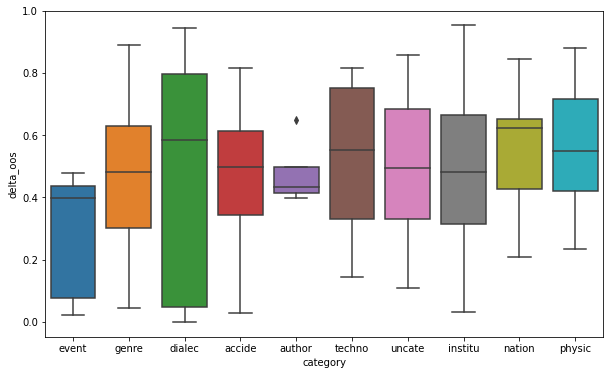

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = avgdf, x = 'category', y = 'delta_oos', order = ['event', 'genre','dialec', 'accide', 'author',  'techno', 'uncate',  
                                                                  'institu', 'nation', 'physic'])
plt.show()

### Testing our pre-registered hypothesis about categories

We specified that we didn't expect *p* < .05 kind of significance here, because n is very low (n for the three categories is 5, 4, and 9)!

Instead we were going to look at effect size. For instance, Cohen's *d*. And any way you measure this (in or out of sample), there is in fact a non-trivial effect.

But this is mostly the ```event``` (and to some extent ```accident```) topics pulling down the ```technology``` category. If we just considered the technology topics by themselves, they wouldn't seem notably divergent from the rest of the model.

So our hypothesis is confirmed, but with some internal variation that shows we're not seeing exactly what we might have expected.

In [20]:
target_cat_deltas = avgdf.loc[(avgdf.category == 'event') | (avgdf.category == 'accide') | (avgdf.category == 'techno'), 'delta']
np.mean(target_cat_deltas)

0.4948746182807826

In [21]:
other_deltas = avgdf.loc[(avgdf.category != 'event') & (avgdf.category != 'accide') & (avgdf.category != 'techno'), 'delta']
np.mean(other_deltas)

0.5554477741932468

In [22]:
## Calculate Cohen's d.

(np.mean(other_deltas) - np.mean(target_cat_deltas)) / np.std(avgdf.delta)

0.2819610452134753

In [23]:
target_cat_oos = avgdf.loc[(avgdf.category == 'event') | (avgdf.category == 'accide') | (avgdf.category == 'techno'), 'delta_oos']
np.mean(target_cat_oos)

0.4433248918549355

In [24]:
other_oos = avgdf.loc[(avgdf.category != 'event') & (avgdf.category != 'accide') & (avgdf.category != 'techno'), 'delta_oos']
np.mean(other_oos)

0.5026816289652911

In [25]:
## Calculate Cohen's d.

(np.mean(other_oos) - np.mean(target_cat_oos)) / np.std(avgdf.delta_oos)

0.2640907670048743

### Where is r2 strong?

This is a bit of a surprise. Whether we calculate in or out of sample, "genre" and "physical description" are the categories where chronological variables have most explanatory power.

I might have expected ```technology``` and ```event``` to have higher r2s.

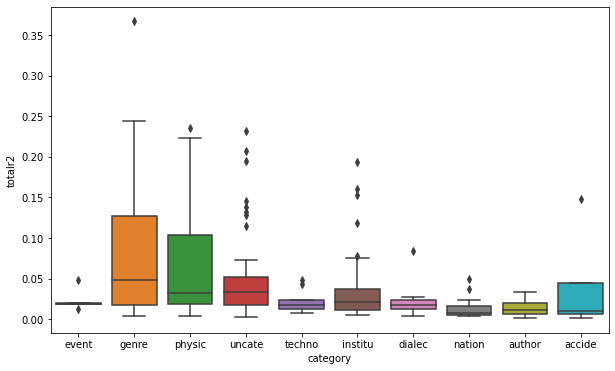

In [26]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = avgdf, x = 'category', y = 'totalr2')
plt.show()

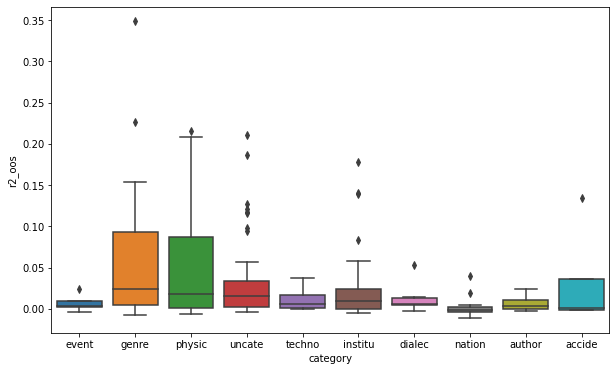

In [27]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = avgdf, x = 'category', y = 'r2_oos')
plt.show()

### Examine particular topics to understand patterns better

Let's look at the trajectories of topics over time to understand why they are associated with period or cohort.

In [28]:
bookdata = pd.read_csv('../topicdata/bookleveltopicdata.tsv', sep = '\t', low_memory = False) 

In [29]:
data = bookdata.loc[bookdata.us_national & (bookdata.firstpub > 1889) & (bookdata.firstpub < 1990), : ]
data.shape

(5572, 208)

In [30]:
def extract_trajectories(depvar, data):
    avgbyfirstpub = []
    avgbybirthyear = []
    firstpubtimeline = []
    birthyeartimeline = []
    for fp, df in data.groupby('firstpub'):
        if fp > 1889 and fp < 1990:
            firstpubtimeline.append(fp)
            avgbyfirstpub.append(np.mean(df[depvar]))
            
    for by, df in data.groupby('birthyear'):
        if by > 1850 and by < 1960:
            birthyeartimeline.append(by)
            avgbybirthyear.append(np.mean(df[depvar]))
    
    return firstpubtimeline, avgbyfirstpub, birthyeartimeline, avgbybirthyear

In [31]:
fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t0', data)

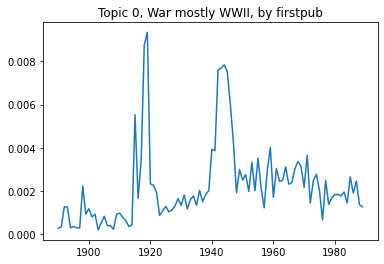

In [32]:
sns.lineplot(x = fpxaxis, y = avgbyfirstpub)
plt.title('Topic 0, War mostly WWII, by firstpub')
plt.show()

You can see why models of that trajectory invariably choose a 4-year granularity. It's very tightly responsive to events.

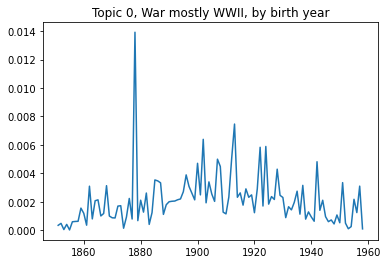

In [33]:
sns.lineplot(x = byxaxis, y = avgbybirthyear)
plt.title('Topic 0, War mostly WWII, by birth year')
plt.show()

Although there is one crazy spike there, models of birthyear choose a 16-year granularity on average, because it's a smoother pattern on the whole.

### Sorting topics

In [34]:
sorteddeltas = avgdf.sort_values(by = 'delta')

In [35]:
sorteddeltas.head()

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
155,0.014852,0.036497,0.029332,5.1628,338.5356,0.014496,0.312721,0.147988,0.134704,6.2,15.6,0.156615,word segmentation errors,accide,0.145
0,0.052664,0.185230,0.078345,11.6860,209.5212,0.020000,0.102817,0.047869,0.024379,6.2,24.0,0.533250,"war, mostly WWII",event,0.267
46,0.092189,0.240971,0.056178,15.9622,160.6896,0.021876,0.354566,0.160667,0.139752,5.2,18.0,1.082250,"late-19c sentiment, including especially love...",institu,0.817
93,0.094949,0.179218,0.096354,5.3032,50.5068,0.006774,0.052534,0.018439,0.009324,4.2,8.8,8.067500,British peerage and gentry,institu,0.157
164,0.119125,0.195157,0.143564,8.6244,63.8074,0.009845,0.062719,0.042852,0.033963,5.0,8.8,2.364250,automobiles,techno,0.310


In [36]:
sorteddeltas.tail(10)

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
112,0.862232,0.807908,0.570240,10.1134,1.0940,0.003210,0.000783,0.002597,-0.002507,7.2,3.4,3.579750,proper names?,uncate,0.033
17,0.862723,0.750857,0.816575,82.3630,13.2438,0.107456,0.029212,0.029327,0.014300,10.4,5.2,2.959750,first person,uncate,0.910
78,0.878074,0.842877,0.891197,374.5580,51.8338,0.522826,0.067959,0.186861,0.146170,11.0,10.2,4.570750,late 19c love stories,genre,0.764
52,0.883668,0.830945,0.509696,45.8502,6.3760,0.013201,0.017213,0.019433,-0.001141,6.2,4.2,0.191000,very general topic,uncate,1.297
141,0.890943,0.729248,0.807301,113.7990,12.0884,0.131831,0.026369,0.127231,0.111501,14.4,4.2,0.138161,late 20c cities,physic,0.500
38,0.898771,0.854928,0.952820,162.2764,18.7118,0.261381,0.014548,0.118214,0.083710,11.0,8.6,2.450000,late 19c home life,institu,0.763
180,0.913636,0.857466,0.881170,17.3784,1.6586,0.024385,0.003454,0.009265,-0.003754,5.6,3.2,11.995250,trees and forests,physic,0.474
153,0.935969,0.913141,0.785671,23.1538,1.5740,0.008312,0.001488,0.007540,-0.001871,5.0,3.6,9.542250,California and the West Coast,nation,0.110
23,0.936870,0.874705,0.752693,37.1146,2.3390,0.017107,0.004846,0.018271,0.005998,7.2,3.2,1.084250,horse-drawn modes of transportation,techno,0.301
87,0.954204,0.929668,0.850606,408.0858,16.3888,0.201818,0.029537,0.195557,0.117245,10.4,5.4,7.127000,late 19c abstract diction,uncate,0.930


In [37]:
fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t141', data)

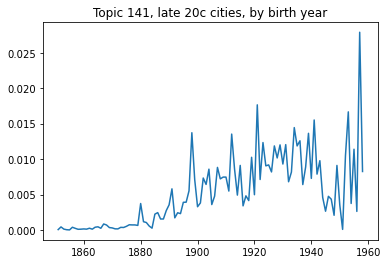

In [38]:
sns.lineplot(x = byxaxis, y = avgbybirthyear)
plt.title('Topic 141, late 20c cities, by birth year')
plt.show()

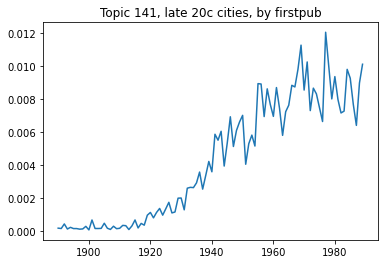

In [39]:
sns.lineplot(x = fpxaxis, y = avgbyfirstpub)
plt.title('Topic 141, late 20c cities, by firstpub')
plt.show()

In [40]:
avgdf.loc[avgdf.category == 'physic', : ]

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
2,0.642251,0.671377,0.433169,16.1334,9.5950,0.012027,0.011970,0.006939,-0.004519,4.8,5.4,2.733750,"objects in relation to doors, pockets, rooms, ...",physic,0.479
12,0.619664,0.743034,0.526984,110.3678,68.5130,0.121199,0.110291,0.110491,0.094749,6.6,11.6,5.738000,"physical sensation, mid-20c",physic,0.754
14,0.849026,0.921226,0.877274,74.3546,15.2248,0.061578,0.009605,0.022989,0.010123,4.0,8.6,3.239500,food and cooking,physic,0.421
19,0.425518,0.610806,0.695254,64.9130,90.5732,0.118209,0.051468,0.107305,0.093748,5.4,13.6,33.477250,mid-20c interiors,physic,0.540
24,0.300620,0.369970,0.290266,17.1328,41.5344,0.008484,0.020545,0.022000,0.008712,4.6,6.8,19.683250,"houses at night, sleep, darkness",physic,0.635
39,0.772991,0.712440,0.661898,63.8312,14.0710,0.018771,0.007498,0.041081,0.022597,10.0,5.0,38.503750,landscape description,physic,0.657
75,0.741445,0.784263,0.827155,36.6232,15.7282,0.038935,0.023575,0.022977,0.004459,4.8,7.6,10.073500,passage of time,physic,0.764
91,0.718759,0.757074,0.306810,20.4604,8.3168,0.006280,0.014546,0.010555,-0.001228,4.0,5.6,1.014500,gardens and plants,physic,0.392
101,0.582919,0.596098,0.526709,51.0450,35.9842,0.039325,0.037446,0.057992,0.039891,7.4,8.0,44.059750,"restrained, clinical description by hardboiled...",physic,0.961
115,0.312571,0.288060,0.280220,33.1652,77.5594,0.028404,0.084346,0.105974,0.090311,7.2,9.0,12.876250,human faces and expressions,physic,0.861


In [41]:
fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t50', bookdata)

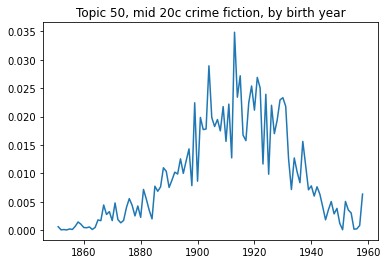

In [42]:
sns.lineplot(x = byxaxis, y = avgbybirthyear)
plt.title('Topic 50, mid 20c crime fiction, by birth year')
plt.show()

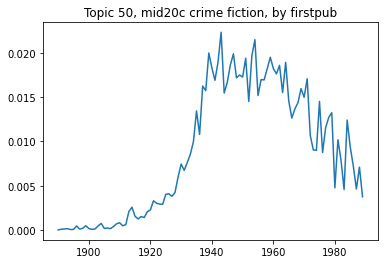

In [43]:
sns.lineplot(x = fpxaxis, y = avgbyfirstpub)
plt.title('Topic 50, mid20c crime fiction, by firstpub')
plt.show()

In [44]:
bydelta = avgdf.sort_values(by = 'totalr2')
bydelta.tail(20)

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
89,0.612109,0.681765,0.548672,139.9130,64.6264,0.163800,0.087165,0.135522,0.091891,14.8,14.4,7.646500,crime fiction and 'gritty urban realism.' late...,genre,0.346
3,0.238089,0.454468,0.140974,46.8034,151.2078,0.029488,0.198506,0.136532,0.122522,5.6,16.0,9.896750,late 20c US political thrillers,genre,0.388
113,0.575939,0.602340,0.838727,71.5878,52.3760,0.174930,0.032766,0.136884,0.120186,8.0,8.8,22.913250,late-20c writers with literary aspiration,genre,0.475
190,0.552790,0.677455,0.508115,40.5556,32.8828,0.074748,0.071159,0.137759,0.127056,4.2,9.2,1.794250,hard to say,uncate,0.894
70,0.548753,0.610658,0.587443,73.6266,55.9138,0.101339,0.067572,0.146111,0.121455,4.4,6.2,0.107442,matter-of-fact journalistic language in advent...,uncate,1.127
155,0.014852,0.036497,0.029332,5.1628,338.5356,0.014496,0.312721,0.147988,0.134704,6.2,15.6,0.156615,word segmentation errors,accide,0.145
7,0.252785,0.350066,0.175732,51.6870,150.3616,0.035962,0.170636,0.148448,0.119181,6.6,10.8,4.181500,E20c adventure fiction,genre,0.658
129,0.702574,0.752227,0.663718,88.0232,37.1638,0.117013,0.059160,0.153453,0.140060,4.0,6.0,0.061234,verbs of speech,institu,0.644
46,0.092189,0.240971,0.056178,15.9622,160.6896,0.021876,0.354566,0.160667,0.139752,5.2,18.0,1.082250,"late-19c sentiment, including especially love...",institu,0.817
50,0.388682,0.614510,0.334196,118.1938,186.6810,0.133405,0.172822,0.164591,0.145607,8.2,19.2,7.491250,mid 20c crime fiction,genre,0.703


In [45]:
fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t141', bookdata)

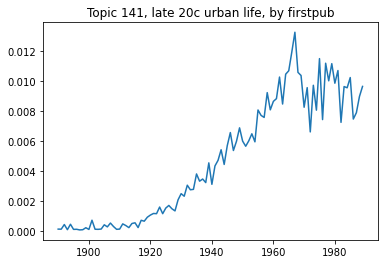

In [46]:
sns.lineplot(x = fpxaxis, y = avgbyfirstpub)
plt.title('Topic 141, late 20c urban life, by firstpub')
plt.show()

In [47]:
techno = avgdf.loc[avgdf.category == 'techno', : ].copy()
techno.sort_values(by = 'delta', inplace = True)
techno.loc[ : , ['delta', 'delta_oos', 'totalr2', 'bydf', 'fpdf', 'label']]

,delta,delta_oos,totalr2,bydf,fpdf,label
164,0.119125,0.143564,0.042852,5.0,8.8,automobiles
22,0.223877,0.330783,0.048069,5.4,5.8,e20c rail travel
122,0.462933,0.551469,0.023809,7.2,8.2,aeronautics
36,0.465517,0.286493,0.017820,6.4,5.4,late 20c hospitals
11,0.555884,0.409350,0.012866,9.2,5.6,e20c industrial work
8,0.772940,0.670555,0.012472,9.8,7.6,e20c medicine
134,0.775382,0.816222,0.007277,4.8,5.2,boats and nautical matters
104,0.861139,0.761168,0.010130,5.0,4.8,sea travel (and perhaps also colonialism?)
23,0.936870,0.752693,0.018271,7.2,3.2,horse-drawn modes of transportation


In [48]:
fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t36', data)

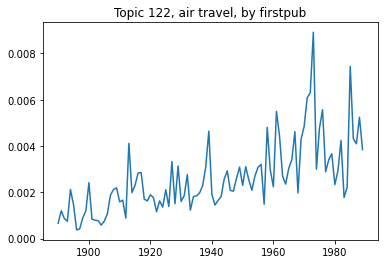

In [49]:
sns.lineplot(x = fpxaxis, y = avgbyfirstpub)
plt.title('Topic 122, air travel, by firstpub')
plt.show()

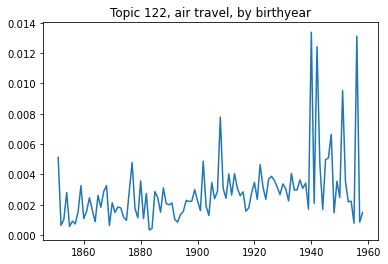

In [50]:
sns.lineplot(x = byxaxis, y = avgbybirthyear)
plt.title('Topic 122, air travel, by birthyear')
plt.show()

In [51]:
from scipy.stats import spearmanr

In [52]:
slopes = []

for topnum in range(200):
    fpxaxis, avgbyfirstpub, byxaxis, avgbybirthyear = extract_trajectories('t' + str(topnum), data)
    r1, p = spearmanr(fpxaxis, avgbyfirstpub)
    # r2, p = spearmanr(byxaxis, avgbybirthyear)
    slopes.append(r1)

slopes = np.array(slopes)

In [53]:
spearmanr(slopes[np.abs(slopes) > .4], avgdf.delta[np.abs(slopes) > .4])

SpearmanrResult(correlation=-0.11429740361919746, pvalue=0.20622331592717927)

In [54]:
len(slopes[np.abs(slopes) > .4])

124

In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(avgdf.delta[slopes > .45], avgdf.delta[slopes < -.45])

Ttest_indResult(statistic=-1.6262878735046464, pvalue=0.10680287568397712)

In [57]:
len(avgdf.delta[slopes < -.45])

62

In [58]:
update =[]
with open('topicupdate3.txt') as f:
    for line in f:
        update.append(float(line.strip()))

In [59]:
spearmanr(update, avgdf.delta_oos)

SpearmanrResult(correlation=-0.10084525916998334, pvalue=0.15535956763302264)

In [60]:
avgdf.head()

,delta,adjdelta,delta_oos,cmse,pmse,cmse_oos,pmse_oos,totalr2,r2_oos,bydf,fpdf,agemse,label,category,pct
0,0.052664,0.185230,0.078345,11.6860,209.5212,0.020000,0.102817,0.047869,0.024379,6.2,24.0,0.53325,"war, mostly WWII",event,0.267
1,0.578712,0.596288,0.689357,25.0768,16.0822,0.061597,0.017510,0.017090,0.003942,4.8,6.0,2.13175,"e20c scientists, labs, and professors, mostly ...",genre,0.288
2,0.642251,0.671377,0.433169,16.1334,9.5950,0.012027,0.011970,0.006939,-0.004519,4.8,5.4,2.73375,"objects in relation to doors, pockets, rooms, ...",physic,0.479
3,0.238089,0.454468,0.140974,46.8034,151.2078,0.029488,0.198506,0.136532,0.122522,5.6,16.0,9.89675,late 20c US political thrillers,genre,0.388
4,0.783425,0.661006,0.809441,61.5444,17.3744,0.078168,0.020837,0.028121,0.011077,8.6,4.8,4.91075,diffuse,uncate,0.666


In [61]:
avgdf.to_csv('mean_topic_result.tsv', sep = '\t', index_label = 'topic')